In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import tabulate
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
with h5py.File('results.hdf5', 'r') as f:
    loss_history = f['loss_history'][()]
    param_history = f['param_history'][()]
    true_params = f.attrs['true_params']

Text(0.5, 0, 'Iterations')

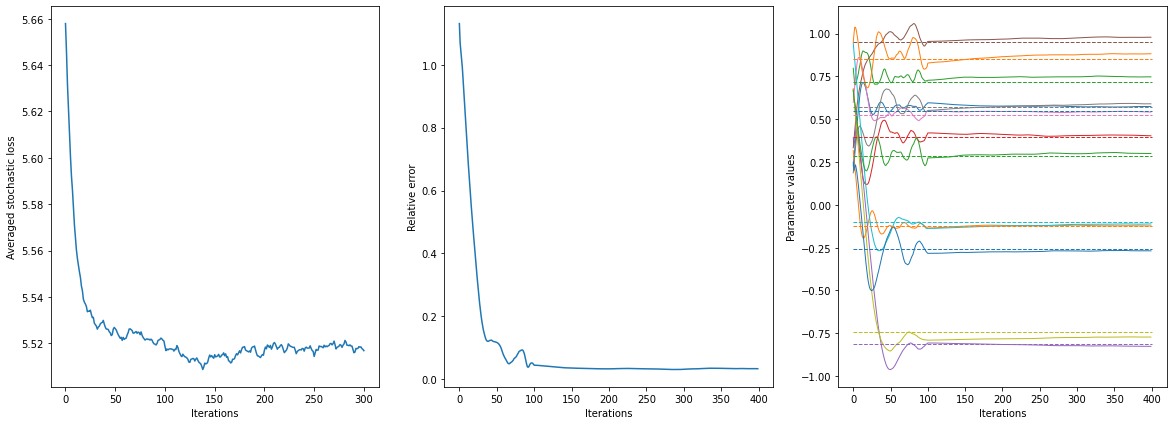

In [3]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
v = 100  # running average for the loss
ax1.plot(np.convolve(loss_history, np.full(v, 1/v), mode='valid'))
ax1.set_ylabel('Averaged stochastic loss')
ax1.set_xlabel('Iterations')
norm = np.linalg.norm(true_params)
ax2.plot([np.linalg.norm(p - true_params) / norm for p in param_history])
ax2.set_ylabel('Relative error')
ax2.set_xlabel('Iterations')
for p in param_history.T[:]:
    ax3.plot(p, linewidth=1)
cmap = plt.get_cmap("tab10")
ax3.hlines(true_params[:], xmin=0, xmax=len(p), linewidth=1, linestyle='dashed', color=cmap.colors)
ax3.set_ylabel('Parameter values')
ax3.set_xlabel('Iterations')
# plt.savefig('no-disorder.pdf')